[Dataset Source](https://www.unb.ca/cic/datasets/ddos-2019.html)

In [1]:
!pip3 install hilbertcurve


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [43]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from hilbertcurve.hilbertcurve import HilbertCurve
import ipaddress


import statsmodels.api as sm

import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import hilbertcurve.hilbertcurve as hcurve
from hilbertcurve.hilbertcurve import HilbertCurve
import socket, struct
import scipy.sparse as spar
import seaborn as sns
from datetime import datetime
import ipaddress
from collections import defaultdict
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.dates as mdates

sns.set()
sns.set(style='darkgrid')
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import re
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates
from collections import defaultdict
import ipaddress
import socket, struct
from hilbertcurve.hilbertcurve import HilbertCurve
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import entropy
from multiprocessing import Pool
from sklearn.neighbors import NearestNeighbors

sns.set()

In [3]:

directory = '01-12'
filename = directory + '/DrDoS_DNS.csv'
nrows = 5074413
df = pd.read_csv(directory + '/DrDoS_DNS.csv',usecols=[' Source IP',' Destination IP',' Timestamp'],nrows=nrows//5)
df.rename(columns={2:'Src IP',4:'Dst IP',7:'Timestamp'},inplace=True)

In [12]:
ip_counts = df['Src IP'].value_counts()
print(ip_counts)

172.16.0.5       1011732
192.168.50.1        1151
192.168.50.6         755
192.168.50.8         529
192.168.50.7         307
                  ...   
172.217.1.4            1
172.217.5.226          1
172.217.0.99           1
208.185.55.51          1
52.36.71.24            1
Name: Src IP, Length: 106, dtype: int64


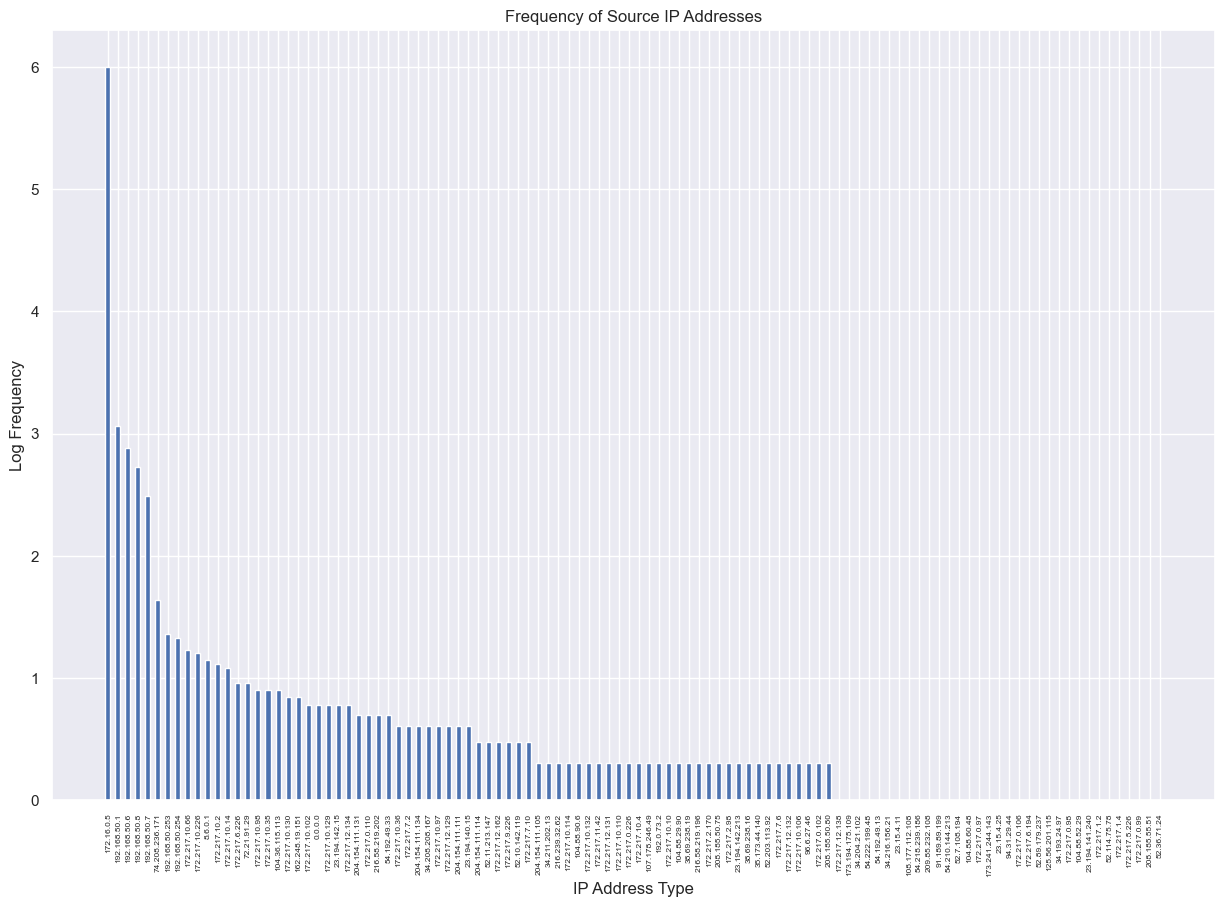

In [13]:

# compute IP address frequency counts
ip_counts = df['Src IP'].value_counts()

fig = plt.figure(figsize=(15, 10))
plt.bar(ip_counts.index, np.log10(ip_counts.values), width=0.5)
plt.xticks(np.arange(len(ip_counts.index)), ip_counts.index, rotation=90, fontsize=6)
plt.xlabel('IP Address Type')
plt.ylabel('Log Frequency')
plt.title('Frequency of Source IP Addresses')
plt.show()

In [ ]:
import numpy as np
from hilbertcurve.hilbertcurve import HilbertCurve
import matplotlib.pyplot as plt
import socket, struct
import scipy.sparse as sparse
from PIL import Image
sns.set()
# convert IP addresses to integers
int_ips = np.array([struct.unpack("!I", socket.inet_aton(ip))[0] for ip in df['Src IP']])

# map integer IPs to Hilbert curve index
max_index = 2**32 - 1 # maximum possible integer IP
num_points = len(int_ips)
order = int(round((num_points**0.5) / 2.0)) # Hilbert curve order
order = 4
n_points = len(int_ips)
# order = n_points

hilbert_curve = HilbertCurve(order, 2, n_procs=-1) # 2-dimensional curve

indexes = np.array(int_ips * (2**order) / max_index)
indexes = np.round(np.unique(indexes)) # remove duplicates for faster indexing
coords = np.array(hilbert_curve.points_from_distances(indexes))

# create heatmap using numpy and matplotlib
heatmap, xedges, yedges = np.histogram2d(coords[:, 0], coords[:, 1], bins=2**order)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent=extent, origin='lower')

# tick_positions = np.linspace(0, max_distance, num=5, dtype=int)
# tick_labels = [int_to_ip_bytes(int(hilbert_curve.point_from_distance(d))[0]) for d in tick_positions]
# plt.xticks(tick_positions, tick_labels, rotation=90)
# plt.yticks(tick_positions, tick_labels)

# Set the plot title and axis labels
plt.title('Hilbert Curve Heatmap')
plt.xlabel('IP Address Range')
plt.ylabel('IP Address Range')

plt.colorbar()
plt.show()


The [algorithm](https://medium.com/jamf-engineering/how-we-mapped-the-internet-to-discover-carriers-ba9a9ad586e5) which we chose for clustering our data in the Hilbert space was dynamic method density-based spatial clustering of applications with noise (DMDBSCAN). This clustering method uses a k-Nearest Neighbour (kNN) search to determine suitable parameters for the different density levels found in the dataset and then applies the DBSCAN algorithm for each determined density level.

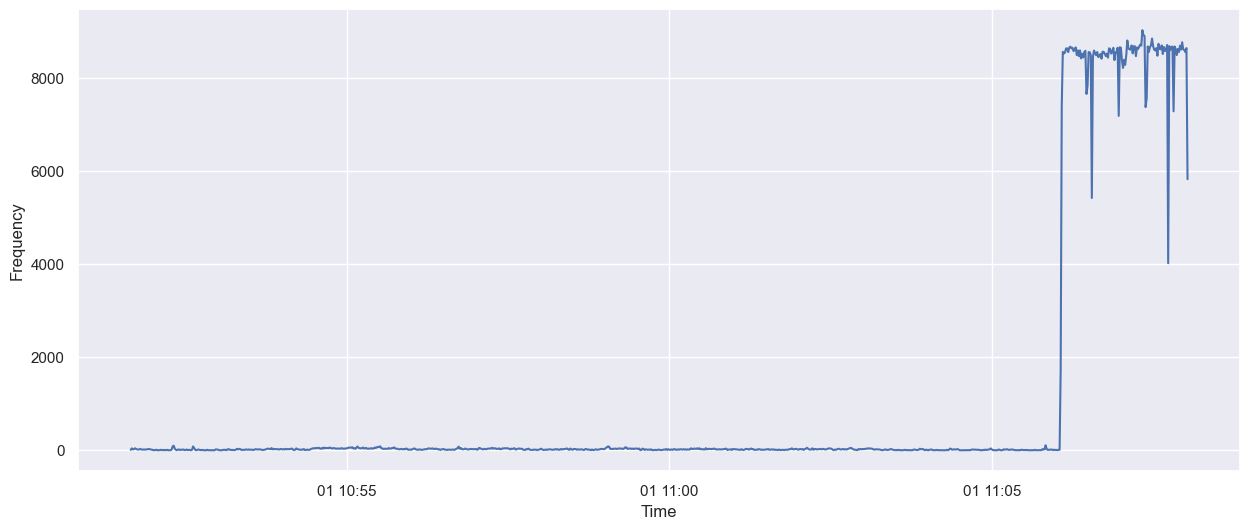

In [14]:
def plot_timeseries(df):

  # Convert the Timestamp column to a datetime object
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])

  # Set the Timestamp column as the DataFrame index
  df.set_index('Timestamp', inplace=True)

  # Resample the DataFrame to one-second intervals and count the number of occurrences
  resampled = df['Src IP'].resample('1S').count()

  # Plot the resampled data
  fig, ax = plt.subplots(figsize=(15, 6))
  ax.plot(resampled.index, resampled.values)
  ax.set_xlabel('Time')
  ax.set_ylabel('Frequency')
  plt.show()

  return resampled

timeseries_df = plot_timeseries(df)

### As we can see spike is much later so we will be reading a bit later

In [ ]:
mean_value = 9_000

# Iterate over the resampled data and print the index values greater than the mean
i = 0
for index, value in timeseries_df.iteritems():
    if i < 1:
      print(index)
    i += 1
    if value > mean_value:
        print(index,value, 'Row #: ', i)
        break

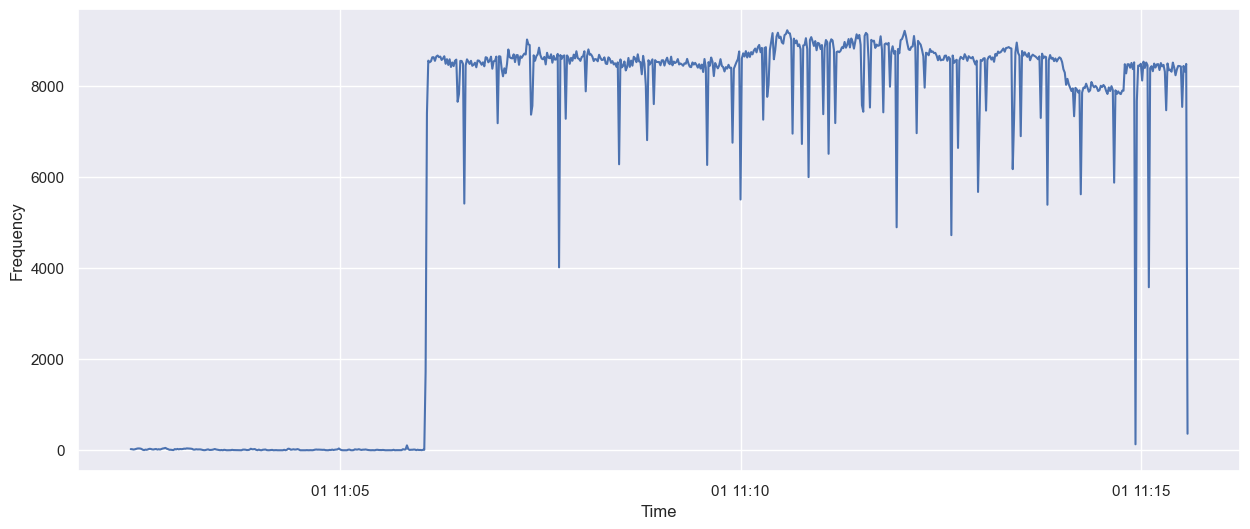

In [35]:

directory = '01-12'
nrows = 5074413
skip_rows = 500_000
nrows = 5074413
skip_rows = 1
df = pd.read_csv(directory + '/DrDoS_DNS.csv',nrows=nrows*95//100,skiprows=skip_rows,header=None,usecols=[2,4,7])
df.rename(columns={2:'Src IP',4:'Dst IP',7:'Timestamp'},inplace=True)

df = df.iloc[15_000:]
df_ts = plot_timeseries(df)

In [38]:
timeseries_df = df_ts 
model = auto_arima(timeseries_df, start_p=0, start_q=0, max_p=3, max_q=3, d=None,
                   seasonal=False, stepwise=True, suppress_warnings=True, error_action="ignore",
                   trace=True, scoring='mse')
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13031.820, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12909.003, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12839.779, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13029.821, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12840.642, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12840.226, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12842.050, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12838.024, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=12838.751, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=12838.630, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=12907.029, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=12840.569, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.442 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  793
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -6417.012
Date:                Wed, 26 Apr 2023   AIC                          12838.024
Time:                        19:01:31   BIC                          12847.373
Sample:                    12-01-2018   HQIC                         12841.617
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5923      0.011    -55.986      0.000      -0.613      -0.572
sigma2      6.382e+05   7065.682     90.319      0.000    6.24e+05    6.52e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):             55488.95
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               2.91   Skew:                            -2.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        43.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09393D+00    |proj g|=  3.66299D-02

At iterate    5    f=  8.09217D+00    |proj g|=  2.05259D-04

At iterate   10    f=  8.09214D+00    |proj g|=  3.75209D-03

At iterate   15    f=  8.09207D+00    |proj g|=  5.24238D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     19      1     0     0   5.242D-06   8.092D+00
  F =   8.0920704395586753     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


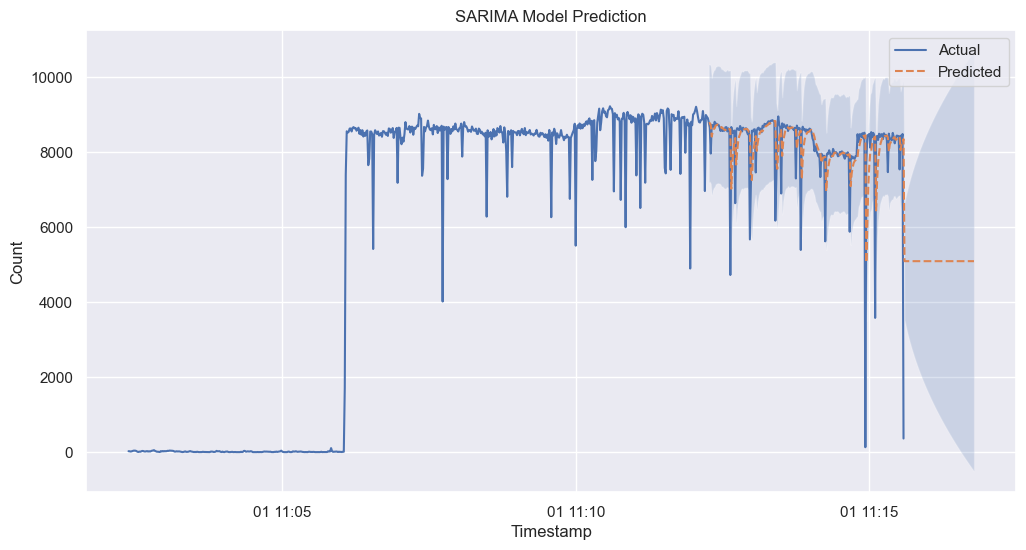

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm



# create a SARIMA model with (p, d, q) = (0, 1, 1) and (P, D, Q, s) = (0, 1, 1, 60)
model = sm.tsa.statespace.SARIMAX(df_ts, order=(0, 1, 1))
results = model.fit()

# predict the values for the next hour
pred = results.get_prediction(start=df_ts.index[-200], end=df_ts.index[-1] + pd.Timedelta(hours=0.02), dynamic=False)

# extract the predicted values, the lower and upper confidence intervals
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# plot the actual values, the predicted values, and the error margins
fig, ax = plt.subplots(figsize=(12, 6))

# plot the actual values
ax.plot(df_ts.index, df_ts, label='Actual')

# plot the predicted values
ax.plot(pred_mean.index, pred_mean, label='Predicted', linestyle='--')

# plot the error margins
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], alpha=0.2)

# set the axis labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Count')
ax.set_title('SARIMA Model Prediction')

# show the legend
ax.legend()

plt.show()


In [40]:
from sklearn.metrics import mean_absolute_percentage_error

# make predictions using the SARIMA model
predictions = results.get_prediction(start=df_ts.index[-50], end=df_ts.index[-1], dynamic=True)

test_values = df_ts.loc[df_ts.index[-50]:df_ts.index[-1]]

# calculate the absolute error
abs_error = abs(test_values - predictions.predicted_mean)

# calculate the percentage error
pct_error = abs_error / test_values * 100

print('Percentage Error',np.median(pct_error))


Percentage Error 7.7047107099630665


In [42]:
def convert_ip_to_int2(ip):
    # Convert the IP address to an integer
    ip_int = int(ipaddress.IPv4Address(ip_str))

    # Convert each integer part of the IP address to a binary string and concatenate them
    ip_parts = (ip_int >> 24, (ip_int >> 16) & 255, (ip_int >> 8) & 255, ip_int & 255)
    binary_str = ''.join(format(p, '08b') for p in ip_parts)

    # Convert each integer part of the IP address to a binary string and concatenate them
    ip_parts = (ip_int >> 24, (ip_int >> 16) & 255, (ip_int >> 8) & 255, ip_int & 255)
    binary_str = ''.join(format(p, '08b') for p in ip_parts)

    # Convert the binary string to a 128-bit integer
    ip_int128 = int(binary_str, 2)
    return ip_int128

def convert_ip_to_int(ip):
    return struct.unpack("!I", socket.inet_aton(ip))[0]

def convert_ip_to_hc_coord(ips):
    ip_to_hc = defaultdict(list)
    hc_to_ip = defaultdict(list)
    
        
    set_ips = set(ips)
    
    map_ips = {}
    for i,ip in enumerate(set_ips):
        val = convert_ip_to_int(ip)
        map_ips[val] = i
    coords = []    
    n = 2
    bits = 64
    # Compute the Hilbert coordinate for the 128-bit integer
    hc = HilbertCurve(bits, n, n_procs=-1)
    coords_set = hc.points_from_distances(map_ips.keys())
    
    coords = []
    for ip in ips:
        int_ip = convert_ip_to_int(ip)
        index = map_ips[int_ip]
        coord = coords_set[index]
        coords.append(coord)
    return coords

coords = convert_ip_to_hc_coord(df['Src IP'])
df['Coords'] = coords

In [ ]:
# cluster the coords array using K-Means
kmeans = KMeans(n_clusters=4, random_state=0).fit(coords)
labels = kmeans.labels_

# add the cluster labels as a new column to the original DataFrame
df['Cluster'] = labels

In [ ]:

fig, axes = plt.subplots(nrows=len(np.unique(labels)), sharex=True, figsize=(15, 10))
# iterate over the clusters and plot the time series for each cluster
for i, label in enumerate(np.unique(labels)):
    # filter the DataFrame for the current cluster
    cluster_df = df[df['Cluster'] == label]
    
    # resample the DataFrame to one-second intervals and count the number of occurrences
    resampled = cluster_df['Src IP'].resample('1S').count()
    
    # plot the resampled data on the corresponding subplot
    ax = axes[i]
    ax.plot(resampled.index, resampled.values)
    ax.set_title(f'Cluster {label}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')

# set the overall title of the figure
fig.suptitle('Time Series for Each Cluster for DDoS')

# adjust the layout of the subplots to avoid overlapping
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
import numpy as np
from statsmodels.tools.eval_measures import meanabs

# Compute one-step-ahead forecast errors
one_step_ahead_forecast_errors = test_values - predictions.predicted_mean

abs_error = abs(test_values - predictions.predicted_mean)

# Compute mean absolute error (MAE) of one-step-ahead forecast errors
MAE = np.mean(abs_error)

# Compute naive forecast errors
naive_forecast_errors = test_values.diff().iloc[1:]

# Compute MAE of naive forecast errors
naive_MAE = np.mean(naive_forecast_errors)

# Compute MASE
MASE = MAE / naive_MAE

In [ ]:
MASE

In [ ]:
import numpy as np

# Compute one-step-ahead forecast errors
one_step_ahead_forecast_errors = test_values - predictions.predicted_mean

# Compute mean absolute error (MAE) of one-step-ahead forecast errors
MAE = np.mean(np.abs(one_step_ahead_forecast_errors))

# Compute naive forecast errors
naive_forecast_errors = test_values.diff().iloc[1:]

# Compute MAE of naive forecast errors
naive_MAE = np.mean(np.abs(naive_forecast_errors))

# Compute MASE
MASE = MAE / naive_MAE


In [ ]:
MASE

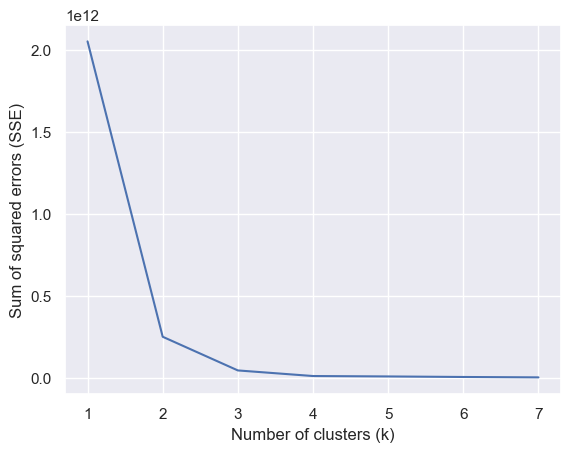

In [44]:

# create an empty list to store SSE values for each k value
sse = []
# try k values from 1 to 5
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    kmeans.fit(coords)
    sse.append(kmeans.inertia_)

# plot SSE values for each k value
plt.plot(range(1, len(sse)+1), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.show()

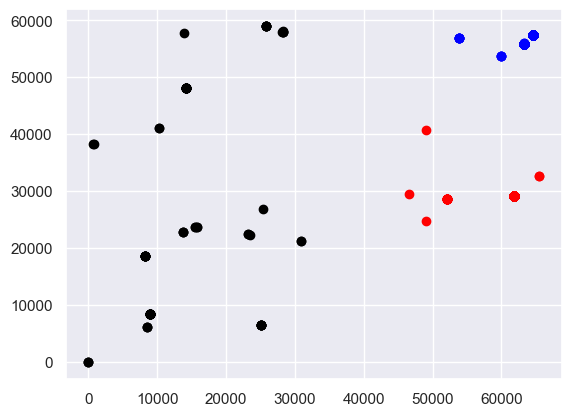

In [45]:
k = 3
kmeans = KMeans(n_clusters=k,n_init='auto',init='k-means++')
kmeans.fit(coords)
df['Cluster'] = kmeans.labels_
# plot the scatter plot for the clusters
colors = ['blue','red','black','purple','green','orange']
for i in range(k):
    plt.scatter(df[df['Cluster']==i]['Coords'].apply(lambda x: x[0]), 
                df[df['Cluster']==i]['Coords'].apply(lambda x: x[1]), 
                color=colors[i])

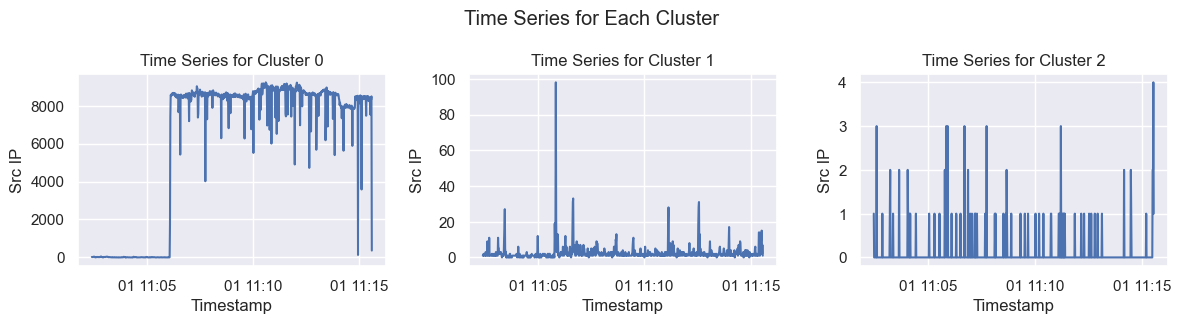

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dimensions of the grid
nrows = 3
ncols = 3

# Create the subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,8))

# Flatten the axs array
axs = axs.flatten()

# Plot the time series for each cluster in a subplot
for i in range(k):
    cluster_i = df[df['Cluster'] == i]
    cluster_i_ts = cluster_i['Src IP'].resample('1S').count()
    sns.lineplot(data=cluster_i_ts, ax=axs[i])
    axs[i].set_title(f'Time Series for Cluster {i}')

# Remove the remaining subplots from the grid
for i in range(k, nrows*ncols):
    fig.delaxes(axs[i])

# Adjust the layout and spacing of the subplots
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Time Series for Each Cluster')
plt.show()
